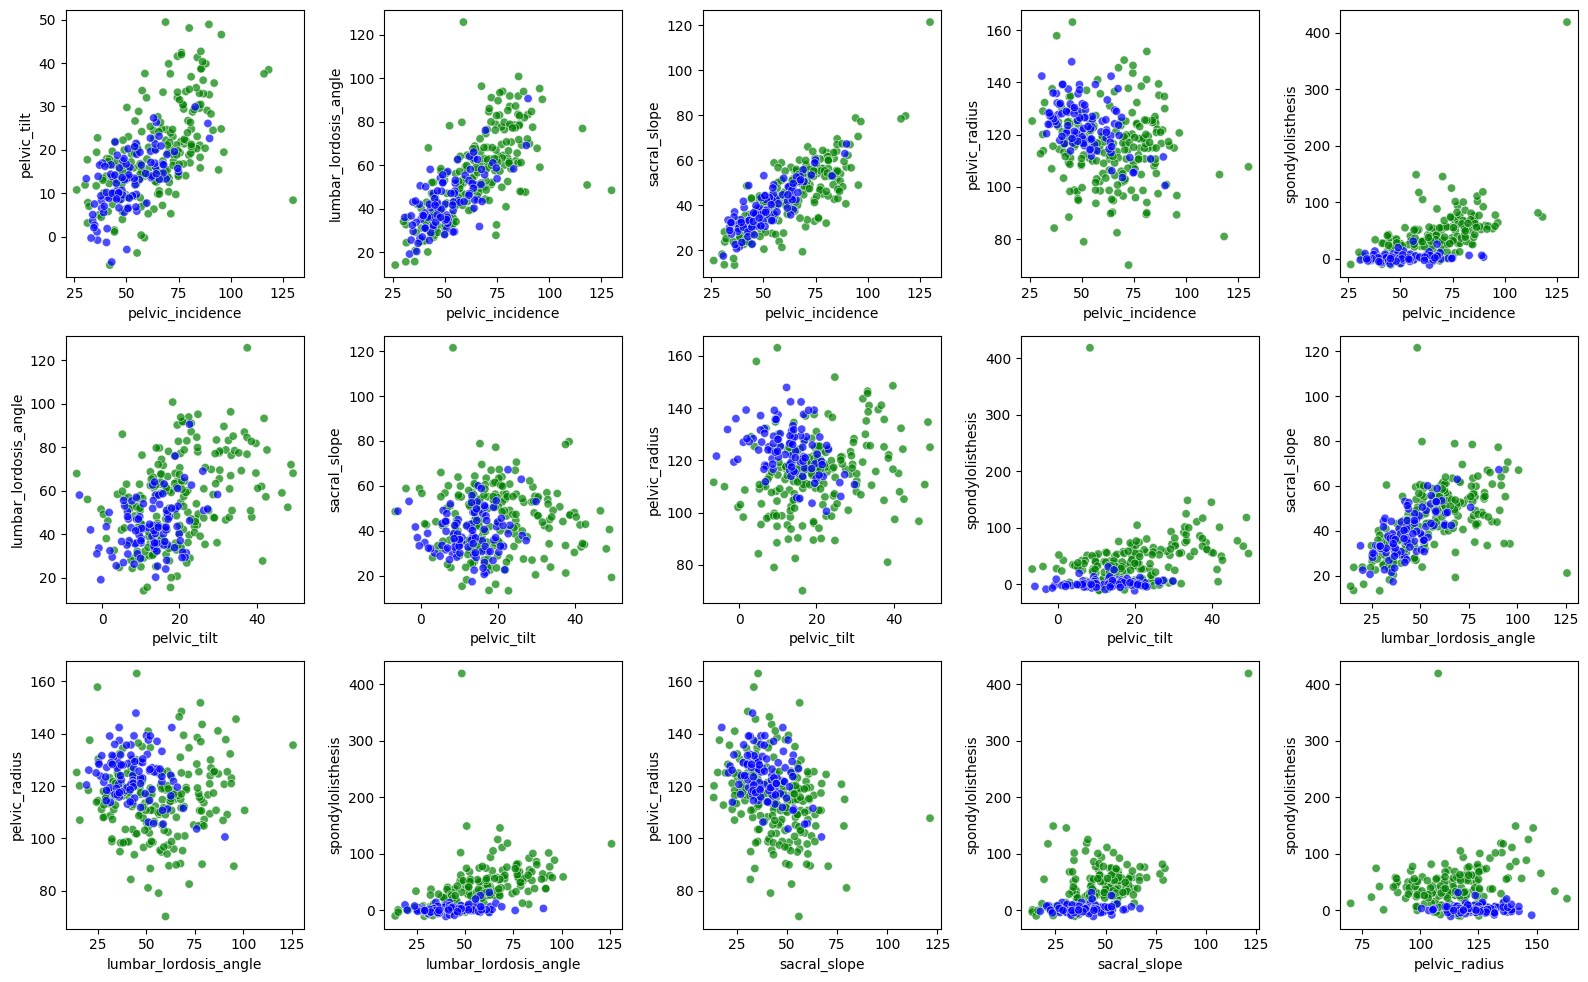

In [28]:
#7-b-i
#Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#read the data file
#local path: /content/sample_data/
file_path = '/content/sample_data/column_2C.dat'
column_names = [
    "pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle",
    "sacral_slope", "pelvic_radius", "spondylolisthesis", "class"
]
data = pd.read_csv(file_path, sep="\s+", header=None, names=column_names)
#Convert the data
data['class_numeric'] = data['class'].map({'NO': 0, 'AB': 1})
#Label the variables
independent_variables = [
    "pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle",
    "sacral_slope", "pelvic_radius", "spondylolisthesis"
]

#Generate scatterplots
plt.figure(figsize=(16, 16))
plot_number = 1
for i, var1 in enumerate(independent_variables):
    for j, var2 in enumerate(independent_variables):
        if i >= j:
            continue
        plt.subplot(len(independent_variables) - 1, len(independent_variables) - 1, plot_number)
        sns.scatterplot(
            x=data[var1],
            y=data[var2],
            hue=data['class_numeric'],
            palette={0: 'blue', 1: 'green'},
            alpha=0.7
        )
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.legend([], [], frameon=False)
        plot_number += 1
plt.tight_layout()
plt.show()

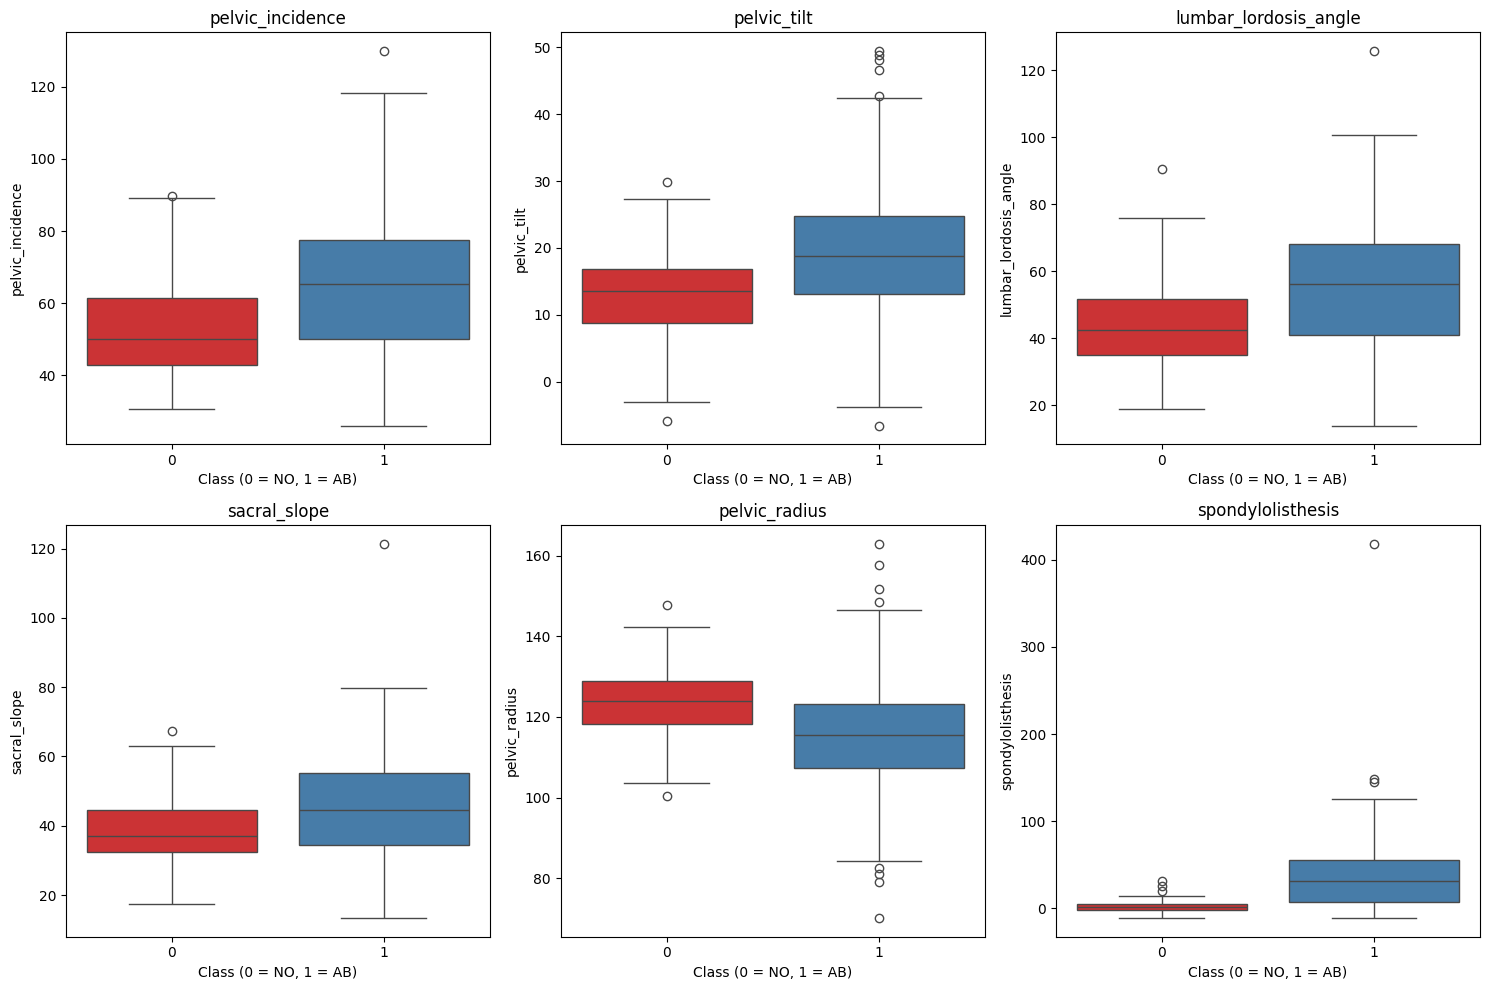

In [4]:
#7-b-ii
#Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

#Generate the boxplot
plt.figure(figsize=(15, 10))
for i, variable in enumerate(independent_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        data=data,
        x='class_numeric',
        y=variable,
        hue='class_numeric',
        dodge=False,
        palette='Set1'
    )
    plt.xlabel('Class (0 = NO, 1 = AB)')
    plt.ylabel(variable)
    plt.title(f'{variable}')
    plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


In [5]:
#7-b-iii
#Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
#training set and the rest of the data as the test set.

#Filter the data
class_0 = data[data['class_numeric'] == 0]
class_1 = data[data['class_numeric'] == 1]

#first 70 rows of class 0 and first 140 rows of class 1 for the training set
train_class_0 = class_0.iloc[:70]
train_class_1 = class_1.iloc[:140]
train_set = pd.concat([train_class_0, train_class_1])
test_class_0 = class_0.iloc[70:]
test_class_1 = class_1.iloc[140:]
test_set = pd.concat([test_class_0, test_class_1])

In [10]:
#7-c-i
#Write code for k-nearest neighbors with Euclidean metric
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Define independent variables and the target variable for training and test sets
X_train = train_set[independent_variables]
y_train = train_set['class_numeric']
X_test = test_set[independent_variables]
y_test = test_set['class_numeric']

#Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
# Train the k-NN classifier
knn.fit(X_train, y_train)
# Predict on the test set
y_pred = knn.predict(X_test)
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Confusion Matrix:")
print(confusion_matrix)



Accuracy: 94.00%

Confusion Matrix:
[[25  5]
 [ 1 69]]


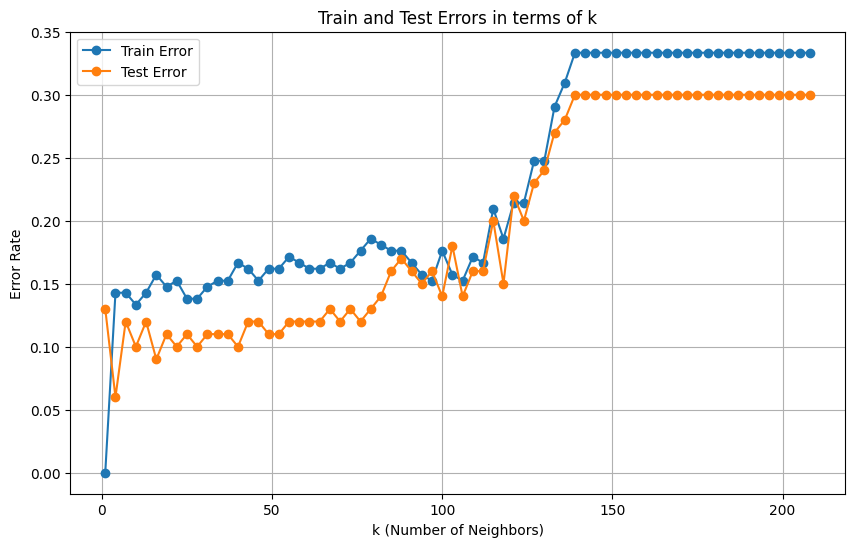

Most suitable k: 4
Confusion Matrix:
[[25  5]
 [ 1 69]]
True Positive Rate: 0.99
True Negative Rate: 0.83
Precision: 0.93
F1-Score: 0.96


In [25]:
#7-c-ii
#Test all the data int the test database with k nearest neighbors.Take decisions by majority polling.
#Plot train and test errors in terms of k(k is in {208,205,...,7,4,1}).Which k* is the most suitable k among these values?
#Calculate the confusioin matrix,true positive rate,true negative rate,precision and F1-score when k=k*
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Define the range of k
k_values = list(range(208, 0, -3))
train_errors = []
test_errors = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    # Calculate errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

#Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Train Error', marker='o')
plt.plot(k_values, test_errors, label='Test Error', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.title('Train and Test Errors in terms of k')
plt.legend()
plt.grid()
plt.show()

#Find the k*
optimal_k_index = np.argmin(test_errors)
k_star = k_values[optimal_k_index]
print(f"Most suitable k: {k_star}")

#Train the model again using k = k*
knn = KNeighborsClassifier(n_neighbors=k_star, metric='euclidean')
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)

#Gernerate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix.ravel()
#Calculate metrics
true_positive_rate = tp / (tp + fn)  # True Positive Rate
true_negative_rate = tn / (tn + fp)  # True Negative Rate
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

#Print the results
print("Confusion Matrix:")
print(conf_matrix)
print(f"True Positive Rate: {true_positive_rate:.2f}")
print(f"True Negative Rate: {true_negative_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")


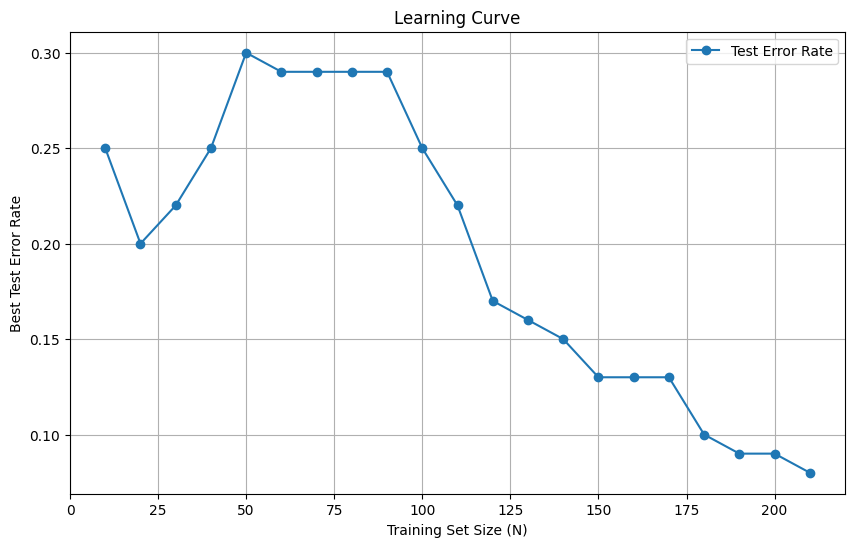

In [18]:
#7-c-iii
#Plot the best test error rate which is obtained by some value of k,against the size of training set

# Define the training set size
N_values = list(range(10, 211, 10))  # N = {10, 20, ..., 210}
optimal_ks = []
test_error_rates = []

# Iterate over different training set sizes
for N in N_values:
    # Select the first ⌊N/3⌋ rows from Class 0 and the first N-⌊N/3⌋ rows from Class 1
    N_class_0 = N // 3
    N_class_1 = N - N_class_0
    subset_class_0 = train_set[train_set['class_numeric'] == 0].iloc[:N_class_0]
    subset_class_1 = train_set[train_set['class_numeric'] == 1].iloc[:N_class_1]
    subset_train_set = pd.concat([subset_class_0, subset_class_1]).sample(frac=1, random_state=42).reset_index(drop=True)

    X_train_subset = subset_train_set[independent_variables]
    y_train_subset = subset_train_set['class_numeric']

    # Define the range of k
    max_k = len(X_train_subset)
    k_values = [k for k in range(1, 197, 5) if k <= max_k]
    best_k = None
    best_test_error = float('inf')
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train_subset, y_train_subset)
        y_test_pred = knn.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        if test_error < best_test_error:
            best_test_error = test_error
            best_k = k

    optimal_ks.append(best_k)
    test_error_rates.append(best_test_error)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_values, test_error_rates, marker='o', label='Test Error Rate')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.grid()
plt.legend()
plt.show()

# Create the learning curve
learning_curve_data = pd.DataFrame({
    'Training Set Size (N)': N_values,
    'Optimal k': optimal_ks,
    'Test Error Rate': test_error_rates
})


In [22]:
#7-d-i
#Replace the Euclidean metric with the following metrics and test them.
#Summarize the test errors in a table

#Define the range of k
k_values = list(range(1, 197, 5))  # {1, 6, 11, ..., 196}
# Metrics to test
metrics = [
    {'name': 'Manhattan', 'p': 1},  # Minkowski with p=1 (Manhattan distance)
    {'name': 'Minkowski_logp', 'log_p_values': np.arange(0.1, 1.1, 0.1)},  # Minkowski with log10(p)
    {'name': 'Chebyshev', 'p': np.inf}  # Minkowski with p -> infinity (Chebyshev distance)
]
results = []
#Go through each metrices
for metric in metrics:
    if metric['name'] == 'Manhattan':
        best_test_error = float('inf')
        best_k = None
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=metric['p'])
            knn.fit(X_train, y_train)
            y_test_pred = knn.predict(X_test)
            test_error = 1 - accuracy_score(y_test, y_test_pred)

            if test_error < best_test_error:
                best_test_error = test_error
                best_k = k
        results.append({'Metric': 'Manhattan', 'Best k': best_k, 'Test Error': best_test_error})
    elif metric['name'] == 'Minkowski_logp':
        for log_p in metric['log_p_values']:
            p = 10 ** log_p
            knn = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=p)
            knn.fit(X_train, y_train)
            y_test_pred = knn.predict(X_test)
            test_error = 1 - accuracy_score(y_test, y_test_pred)
            results.append({'Metric': f'Minkowski ({log_p:.1f})', 'Best k': best_k, 'Test Error': test_error})
    elif metric['name'] == 'Chebyshev':
        best_test_error = float('inf')
        best_k = None

        # Test for Chebyshev distance
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
            knn.fit(X_train, y_train)
            y_test_pred = knn.predict(X_test)
            test_error = 1 - accuracy_score(y_test, y_test_pred)

            if test_error < best_test_error:
                best_test_error = test_error
                best_k = k
        results.append({'Metric': 'Chebyshev', 'Best k': best_k, 'Test Error': best_test_error})

#Display the results
results_df = pd.DataFrame(results)
print(results_df)

             Metric  Best k  Test Error
0         Manhattan       6        0.11
1   Minkowski (0.1)       6        0.09
2   Minkowski (0.2)       6        0.09
3   Minkowski (0.3)       6        0.08
4   Minkowski (0.4)       6        0.08
5   Minkowski (0.5)       6        0.08
6   Minkowski (0.6)       6        0.06
7   Minkowski (0.7)       6        0.07
8   Minkowski (0.8)       6        0.08
9   Minkowski (0.9)       6        0.09
10  Minkowski (1.0)       6        0.09
11        Chebyshev      16        0.08


In [ ]:
#7-d-ii
#Mahalanobis Distance
# Compute the covariance matrix and its inverse from the training data
cov = np.cov(X_train, rowvar=False)
cov_inv = np.linalg.inv(cov)  # Inverse covariance matrix

# Define the range of k values
k_values = list(range(1, 197, 5))  # {1, 6, 11, ..., 196}
best_k = None
best_test_error = float('inf')

# Loop through k values to find the optimal k
for k in k_values:
    # Initialize the k-NN classifier with Mahalanobis distance
    knn = KNeighborsClassifier(
        n_neighbors=k,
        metric='mahalanobis',
        metric_params={'VI': cov_inv}  # Pass the inverse covariance matrix
    )
    knn.fit(X_train, y_train)

    # Evaluate on the test set
    y_test_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    # Update the best k if the current test error is lower
    if test_error < best_test_error:
        best_test_error = test_error
        best_k = k

# Display the results
print(f"Optimal k (Mahalanobis Distance): {best_k}")
print(f"Test Error (Mahalanobis Distance): {best_test_error:.4f}")


Optimal k (Mahalanobis Distance): 1
Test Error (Mahalanobis Distance): 0.1700


In [23]:
#7-e
#Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k in {1,6,11,16,...,196}
#Define the range of k
k_values = list(range(1, 197, 5))
#Define a distance metrics
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
results = []

#Go through each distance metric
for metric in distance_metrics:
    best_test_error = float('inf')
    best_k = None

    #Find the k*
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        knn.fit(X_train, y_train)
        y_test_pred = knn.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        if test_error < best_test_error:
            best_test_error = test_error
            best_k = k

    results.append({
        'Metric': metric,
        'Best k': best_k,
        'Best Test Error': best_test_error
    })

#Print the results
results_df = pd.DataFrame(results)
print(results_df)


      Metric  Best k  Best Test Error
0  euclidean       6             0.10
1  manhattan      26             0.10
2  chebyshev      16             0.11
